# Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки. Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

# Описание данных

Данные для первой части
Файл /datasets/hypothesis.csv:

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


Данные для второй части
Файл /datasets/orders.csv:

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.


Файл /datasets/visitors.csv

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

# Часть 1. Приоритизация гипотез

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

#импортируем файлы с данными
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [2]:
hypothesis.set_axis(['hypothesis',
               'reach',
               'impact',
               'confidence',
               'efforts',
               ], 
               axis = 'columns', 
               inplace = True)

#зададим параметр, чтобы строки отображались полностью
pd.options.display.max_colwidth = 120

hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


##### применим фреймворк ICE для приоритизации гипотез; отсортируем их по убыванию приоритета

In [3]:
#применим фреймфоре ICE для приоритизации гипотез
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
#отсортируем гипотезы по убыванию приоритета
hypothesis_ICE = hypothesis[['hypothesis', 'ICE']].sort_values(by  = 'ICE', ascending = False)
hypothesis_ICE

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


##### применим фреймворк RICE для приоритизации гипотез; отсортируем их по убыванию приоритета

In [4]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
#отсортируем гипотезы по убыванию приоритета
hypothesis_RICE = hypothesis[['hypothesis', 'RICE']].sort_values(by  = 'RICE', ascending = False)
hypothesis_RICE

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


##### Наиболее эффективные гипотезы по RICE с индексами: 7, 2, 0, 6. Гипотеза 8 ушла из топа, так как параметр reach у нее равен 1, гипотезы 7 и 2, напротив, поднялись из-за высоких показателей reach (10 и 2 соответственно).

# Часть 2. Анализ А/В-теста

In [5]:
#импортируем файлы с данными
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [6]:
#подготовим данные. приведем даты к нужному формату
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

In [7]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [9]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [10]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


данные в порядке

##### построим график кумулятивной выручки по группам

In [11]:
#создадим датафрейм с уникальными парами значений 'date' и 'group', избавимся от дубликатов
datesGroups = orders[['date','group']].drop_duplicates()

#объявим переменную, содержащую агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

#объявим переменную, содержащую агрегированные кумулятивные по дням данные о посетителях
visitorsAggregated = datesGroups.apply(
lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

#объединим кумулятивные данные в одной таблице и присвоим ее столбцам понятные названия
cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

#создадим датафрейм с кумулятивной выручкой по дням в группе А
cummulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','revenue']]

#создадим датафрейм с кумулятивной выручкой по дням в группе B
cummulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','revenue']]

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'График кумулятивной выручки по группам')

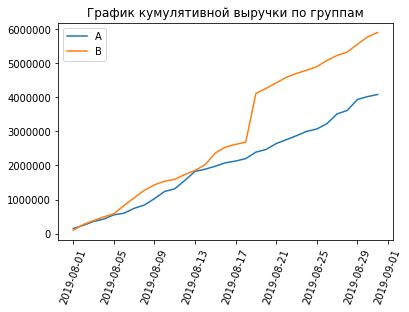

In [12]:
#построим график выручки группы А
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'], label='A')

#построим график выручки группы B
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'], label='B')

plt.xticks(rotation=70)
plt.legend()
plt.title('График кумулятивной выручки по группам')

Выручка почти равномерно увеличивается в течение всего теста. Хороший знак.
Однако график выручки группы В в опеределенной точке резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

In [13]:
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


Среди первых 10 строк цены заказов находятся в диапазоне от 400 до 13710 рублей.

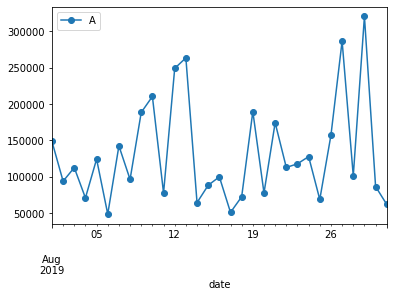

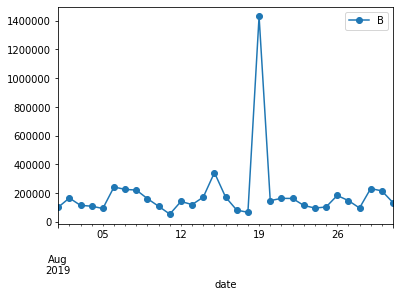

In [14]:
#изучим график распределения стоимостей заказов
revenue_visitor_a = orders.query('group == "A"').groupby('date', as_index = False).agg({'revenue' : 'sum'})
revenue_visitor_b = orders.query('group == "B"').groupby('date', as_index = False).agg({'revenue' : 'sum'})

revenue_visitor_a.plot(x='date', 
         y='revenue', 
         style = 'o-',
         label='A')

revenue_visitor_b.plot(x='date', 
         y='revenue',
         style = 'o-', 
         label='B')

Судя по графикам, причина такого резкого всплеска кумулятивной выручки группы В - один заказ с аномально высокой стоимостью

##### построим график кумулятивного среднего чека по группам

Text(0.5, 1.0, 'Графики кумулятивного среднего чека по группам')

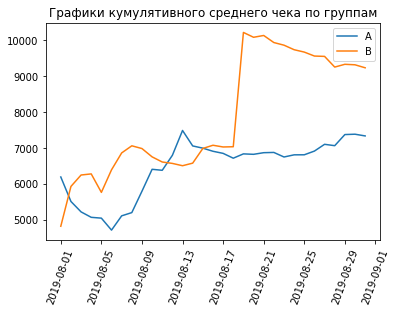

In [15]:
#разделим кумулятивную выручку на кумулятивное число заказов
cummulativeData['average_check'] = cummulativeData['revenue'] / cummulativeData['orders']

#разделим кумулятивный средний чек по группам
cummulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','average_check']]
cummulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','average_check']]

#построим график кумулятивного среднего чека группы А
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['average_check'], label='A')

#построим график кумулятивного среднего чека группы В
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['average_check'], label='B')

plt.xticks(rotation=70)
plt.legend()
plt.title('Графики кумулятивного среднего чека по группам')

На протяжении большей части периода показатели кумулятивного среднего чека группы В выше аналогичного показателя группы А. Однако графики поочередно демонстрируют всплески. Средний чек становится более равномерным ближе к концу теста.

##### построим график относительного изменения кумулятивного среднего чека группы В к группе А

Text(0.5, 1.0, 'Относительное изменение кумулятивного среднего чека группы В к группе А')

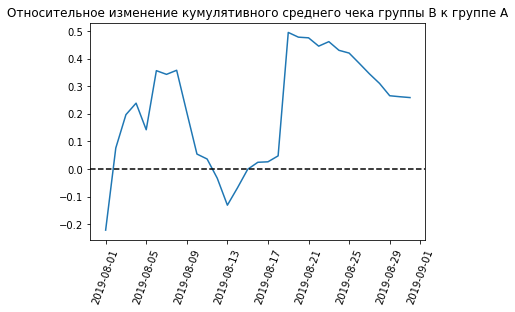

In [16]:
#разделим кумулятивный средний чек по группам
cummulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','revenue', 'orders']]
cummulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','revenue', 'orders']]

#собираем данные в одном датафрейме
mergedCummulativeRevenue = cummulativeRevenueA.merge(cummulativeRevenueB,
                                                     left_on='date',
                                                     right_on='date',
                                                     how='left',
                                                     suffixes=['A', 'B'])

#cтроим отношение средних чеков
plt.plot(mergedCummulativeRevenue['date'],
         (mergedCummulativeRevenue['revenueB'] / mergedCummulativeRevenue['ordersB']) /
         (mergedCummulativeRevenue['revenueA'] / mergedCummulativeRevenue['ordersA']) - 1)

#добавляем ось X
plt.xticks(rotation=70)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего чека группы В к группе А')

В нескольких точках график различия между сегментами резко «скачет». Где-то, вероятно, спрятались крупные заказы и выбросы.

##### построим график кумулятивной конверсии по группам

Text(0.5, 1.0, 'График кумулятивной конверсии по группам')

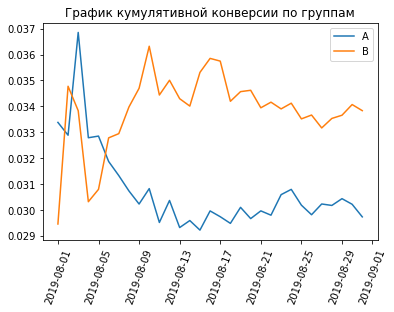

In [17]:
#рассчитаем общую конверсию
cummulativeData['conversion'] = cummulativeData['orders'] / cummulativeData['visitors']

#разделим кумулятивное значение консерсии по группам
cummulativeDataA = cummulativeData[cummulativeData['group'] == 'A']
cummulativeDataB = cummulativeData[cummulativeData['group'] == 'B']

#построим график кумулятивной конверсии группы А
plt.plot(cummulativeDataA['date'], cummulativeDataA['conversion'], label = 'A')

#построим график кумулятивной конверсии группы В
plt.plot(cummulativeDataB['date'], cummulativeDataB['conversion'], label = 'B')
plt.xticks(rotation=70)
plt.legend()
plt.title('График кумулятивной конверсии по группам')

Посетители группы В делали значительно больше заказов, нежели посетители группы А.

##### построим график относительного изменения кумулятивной конверсии группы B к группе A

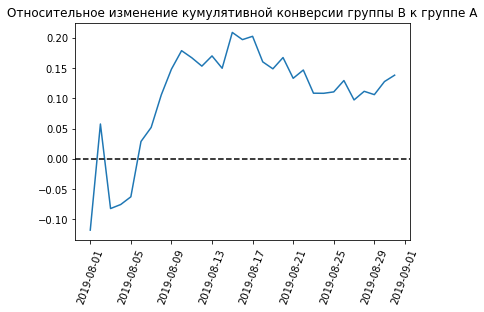

In [18]:
#объединим кумулятивные данные в один датафрейм
mergedCummulativeConversions = cummulativeDataA[['date','conversion']].merge(cummulativeDataB[['date','conversion']], 
                                                                             left_on='date', 
                                                                             right_on='date', 
                                                                             how='left', 
                                                                             suffixes=['A', 'B'])

#построим график относительного различия
plt.plot(mergedCummulativeConversions['date'], 
         mergedCummulativeConversions['conversionB']/ mergedCummulativeConversions['conversionA'] - 1)

plt.xticks(rotation=70)
plt.title('Относительное изменение кумулятивной конверсии группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')

Группа А стабильно хуже группы В по конверсии, и различие увеличивается со временем. Если данных достаточно для статистической значимости, имеет смысл остановить тест: группа А точно не лучше группы В

##### построим точечный график количества заказов по пользователям

In [19]:
#сгруппируем данные таблицы orders по количеству заазов по пользователям
orders_visitor_id = orders.groupby('visitorId').agg({'transactionId' : 'nunique'})

Text(0.5, 1.0, 'Количество заказов по пользователям')

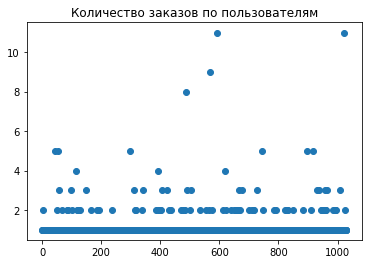

In [20]:
#преобразуем необходимые данные о количестве заказов в Series
x_values = pd.Series(range(0, len(orders_visitor_id['transactionId'])))
#построим точечный график количества заказов на одного пользователя
plt.scatter(x_values, orders_visitor_id['transactionId'])
plt.title('Количество заказов по пользователям')

По графику видно, что в основном на одного пользователя приходится не более 5-ти заказов 

##### посчитаем 95-й и 99-й перцентили количества заказов на одного пользователя

In [21]:
np.percentile(orders_visitor_id['transactionId'], [95, 99])

array([2., 4.])

Не более 1% пользователей оформляли больше чем 4 заказа. И 5% пользователей заказывали более 2-х раз.

В дальнейшем отфильтруем пользователей, взяв только тех, кто совершил до 4-х заказов включительно.

##### посчитаем статистическую значимость различий в конверсии между группами по 'сырым' данным

In [22]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [23]:
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [24]:
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

In [25]:
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [26]:
#объединим полученные массивы
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

In [27]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

In [28]:
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, 
                               index = np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), 
                               name = 'orders')],
                    axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, 
                               index = np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), 
                               name = 'orders')],
                    axis=0)

In [29]:
#применим статистический критерий Манна-Уитни к полученным выборкам
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.008
0.138


Значение альфа для сравнения выборок примем равным 0.02.
По 'сырым' данным в конверсии групп A и B есть различия, p-value составляет 0.008, что меньше 0.02. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем.
Разница между сегментами составляет 13.8%, лидирует группа В.

##### посчитаем статистическую значимость различий в среднем чеке заказа между группами по 'сырым' данным

In [30]:
#применим статистический критерий Манна-Уитни к полученным выборкам
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.365
0.259


P-value значительно больше 0.02. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A

##### посчитаем статистическую значимость различий в конверсии между группами по 'очищенным' данным

In [31]:
#очистим данные от аномальных значений
orders = orders.query('revenue < 500000')

#создадим датафрейм с уникальными парами значений 'date' и 'group', избавимся от дубликатов
datesGroups = orders[['date','group']].drop_duplicates()

#объявим переменную, содержащую агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

#объявим переменную, содержащую агрегированные кумулятивные по дням данные о посетителях
visitorsAggregated = datesGroups.apply(
lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

#объединим кумулятивные данные в одной таблице и присвоим ее столбцам понятные названия
cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

#создадим датафрейм с кумулятивной выручкой по дням в группе А
cummulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','revenue']]

#создадим датафрейм с кумулятивной выручкой по дням в группе B
cummulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','revenue']]

In [32]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 4]['visitorId'], 
                                 ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 20000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

In [33]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId']
                                                           .isin(abnormalUsers))]['orders'],
                             pd.Series(0, 
                                       index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
                                       name='orders')],
                            axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId']
                                                           .isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
                                       name='orders')],
                            axis=0)

In [34]:
#применим статистический критерий Манна-Уитни к полученным выборкам
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.011
0.151


По 'очищенным' данным в конверсии групп A и B есть различия, p-value составляет 0.011, что меньше 0.02. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем.
Разница между сегментами составляет 15,1%, лидирует группа В.

##### посчитаем статистическую значимость различий в среднем чеке заказа между группами по 'очищенным' данным

In [35]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.433
-0.002


P-value увеличился, а разница между сегментами сократилась с 25.9% до 0.2%.

# Вывод

Данный тест можно остановить и считать успешно проведенным. 

Конверсия из пользователя в покупателя у группы B статистически значимо выше, чем у группы A. При этом средний чек между группами не отличается.